In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic.csv")

# Analysing the Data


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [6]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [7]:
sns.set_style("whitegrid")

<AxesSubplot:>

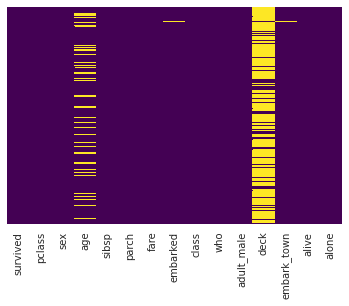

In [8]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
## So our data contains many null values and deck column  contains almost all the null values


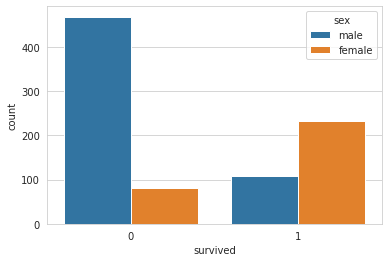

In [10]:
sns.countplot(data=titanic, x="survived", hue="sex")
plt.show()

<AxesSubplot:xlabel='survived', ylabel='count'>

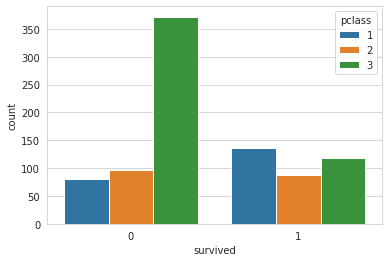

In [11]:
sns.countplot(data=titanic, x="survived", hue="pclass") 

<AxesSubplot:xlabel='sibsp', ylabel='count'>

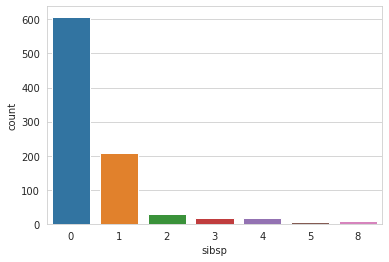

In [12]:
sns.countplot(data=titanic, x="sibsp")

<AxesSubplot:xlabel='adult_male', ylabel='count'>

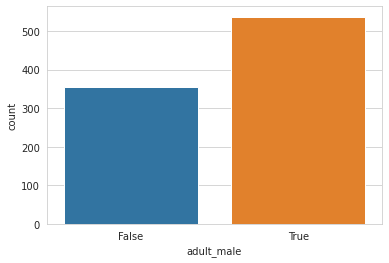

In [13]:
sns.countplot(x=titanic["adult_male"])

<AxesSubplot:ylabel='Frequency'>

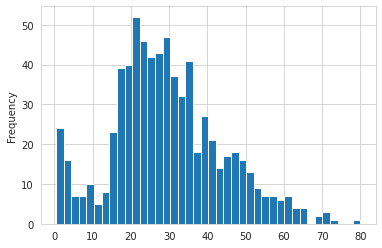

In [14]:
titanic["age"].dropna().plot(kind="hist", bins=40)

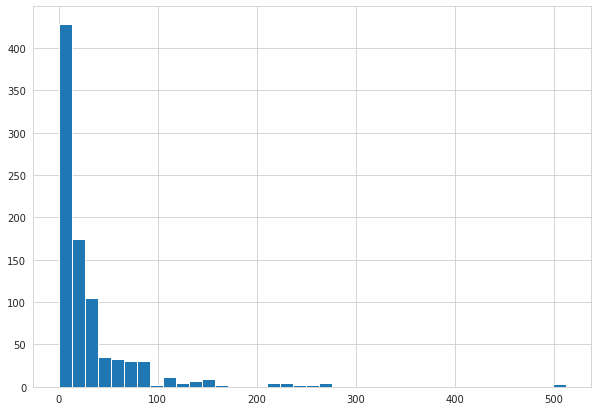

In [15]:
plt.figure(figsize=(10,7))
plt.hist(titanic["fare"],bins=39)
plt.show()

# Data Cleaning

In [16]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [17]:
# removing repeated features and unnecessary fetures  

In [18]:
titanic.drop(["class","adult_male","deck","embark_town","alive"],axis=1,inplace=True)

In [19]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True


<AxesSubplot:>

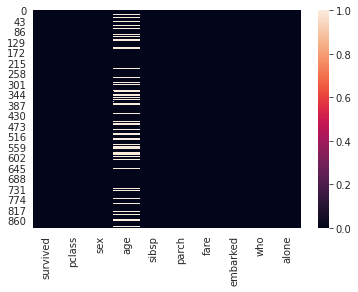

In [20]:
sns.heatmap(titanic.isnull())

In [21]:
# So let's  fill null values of age with some appropriate method we can't drop age null values beacuase it is very 
# important feature for our model :there are two tricks to fill those missing values the most common method is 
# to fill those values with the mean of the age column 
# but we do some advanced trick to fill those values we will use pclass to fill them with because passenger class 
# is directly related to age 
# let's explain ::::
#if you are in first class then probabily you have earned enough money to buy the first class ticket
# and for earning money you probabily be old 
# and this is also common that rich peaple are old because they have spent much time on earning money



## Data Cleaning

<AxesSubplot:xlabel='pclass', ylabel='age'>

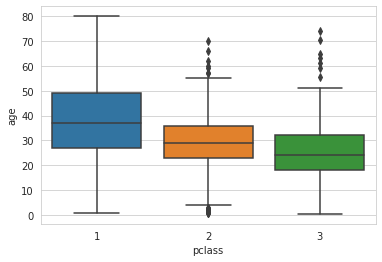

In [22]:
sns.boxplot(data=titanic, x="pclass",y= "age")

In [23]:
def age_impute(cols):
    # out function will take age and class column as a list that's why we have to index it here
    Age=cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 27
        else:
            return 23
    else:
        return Age

In [24]:
titanic["age"] = titanic[["age","pclass"]].apply(age_impute,axis=1)

In [25]:
male=pd.get_dummies(titanic["sex"], drop_first=True)
embark =pd.get_dummies(titanic["embarked"], drop_first=True)
who =pd.get_dummies(titanic["who"], drop_first=True)
alone =pd.get_dummies(titanic["alone"], drop_first=True)


In [26]:
titanic=pd.concat([titanic, male, embark,who,alone],axis=1)

In [27]:
titanic.drop(["sex","embarked","who","alone"], axis=1, inplace=True)

In [28]:
titanic.head(2)

,survived,pclass,age,sibsp,parch,fare,male,Q,S,man,woman,True
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0


In [29]:
# Now our data has been cleaned and it is ready for our  model


# Model Creation

In [30]:
X = titanic.drop(["survived"],axis=1)

In [31]:
y=titanic["survived"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [33]:
Logmodel = LogisticRegression()

In [34]:
Logmodel.fit(X_train, y_train)

/home/khadim/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = Logmodel.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[138  16]
 [ 34  80]]


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.83      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268

